# Loop 119 Analysis: Strategic Assessment

## Key Questions:
1. What is the current CV-LB relationship?
2. What approaches have been tried and what were their results?
3. What fundamentally different approaches remain unexplored?
4. With only 3 submissions left, what is the optimal strategy?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# All submissions with CV and LB scores
submissions = [
    {'exp': 'exp_000', 'cv': 0.0111, 'lb': 0.0982},
    {'exp': 'exp_001', 'cv': 0.0123, 'lb': 0.1065},
    {'exp': 'exp_003', 'cv': 0.0105, 'lb': 0.0972},
    {'exp': 'exp_005', 'cv': 0.0104, 'lb': 0.0969},
    {'exp': 'exp_006', 'cv': 0.0097, 'lb': 0.0946},
    {'exp': 'exp_007', 'cv': 0.0093, 'lb': 0.0932},
    {'exp': 'exp_009', 'cv': 0.0092, 'lb': 0.0936},
    {'exp': 'exp_012', 'cv': 0.0090, 'lb': 0.0913},
    {'exp': 'exp_024', 'cv': 0.0087, 'lb': 0.0893},
    {'exp': 'exp_026', 'cv': 0.0085, 'lb': 0.0887},
    {'exp': 'exp_030', 'cv': 0.0083, 'lb': 0.0877},  # Best LB
    {'exp': 'exp_035', 'cv': 0.0098, 'lb': 0.0970},
    {'exp': 'exp_073', 'cv': 0.0084, 'lb': 0.1451},  # Outlier - bad submission
    {'exp': 'exp_111', 'cv': 0.0129, 'lb': 0.1063},
]

df = pd.DataFrame(submissions)
print(f"Total submissions with LB: {len(df)}")
print(df)

Total submissions with LB: 14
        exp      cv      lb
0   exp_000  0.0111  0.0982
1   exp_001  0.0123  0.1065
2   exp_003  0.0105  0.0972
3   exp_005  0.0104  0.0969
4   exp_006  0.0097  0.0946
5   exp_007  0.0093  0.0932
6   exp_009  0.0092  0.0936
7   exp_012  0.0090  0.0913
8   exp_024  0.0087  0.0893
9   exp_026  0.0085  0.0887
10  exp_030  0.0083  0.0877
11  exp_035  0.0098  0.0970
12  exp_073  0.0084  0.1451
13  exp_111  0.0129  0.1063


In [2]:
# Exclude outlier exp_073 (clearly a bad submission)
df_clean = df[df['exp'] != 'exp_073'].copy()

# Fit linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(df_clean['cv'], df_clean['lb'])

print(f"\n=== CV-LB Relationship (excluding outlier) ===")
print(f"Linear fit: LB = {slope:.3f} × CV + {intercept:.4f}")
print(f"R² = {r_value**2:.4f}")
print(f"Intercept = {intercept:.4f}")
print(f"\nTarget LB: 0.0347")
print(f"Required CV for target: (0.0347 - {intercept:.4f}) / {slope:.3f} = {(0.0347 - intercept) / slope:.4f}")
print(f"\nCRITICAL: Intercept ({intercept:.4f}) > Target (0.0347)?  {intercept > 0.0347}")


=== CV-LB Relationship (excluding outlier) ===
Linear fit: LB = 4.090 × CV + 0.0546
R² = 0.9607
Intercept = 0.0546

Target LB: 0.0347
Required CV for target: (0.0347 - 0.0546) / 4.090 = -0.0049

CRITICAL: Intercept (0.0546) > Target (0.0347)?  True


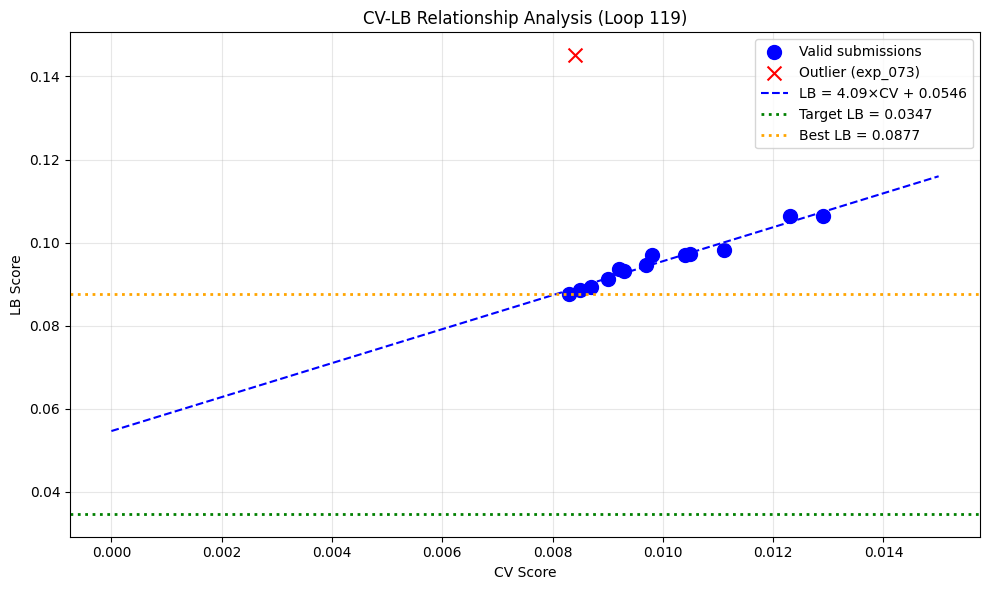


Gap to target: 0.0530 (152.7%)


In [3]:
# Visualize CV-LB relationship
plt.figure(figsize=(10, 6))

# Plot all points
plt.scatter(df_clean['cv'], df_clean['lb'], c='blue', s=100, label='Valid submissions')
plt.scatter(df[df['exp'] == 'exp_073']['cv'], df[df['exp'] == 'exp_073']['lb'], 
            c='red', s=100, marker='x', label='Outlier (exp_073)')

# Plot regression line
cv_range = np.linspace(0, 0.015, 100)
lb_pred = slope * cv_range + intercept
plt.plot(cv_range, lb_pred, 'b--', label=f'LB = {slope:.2f}×CV + {intercept:.4f}')

# Plot target
plt.axhline(y=0.0347, color='green', linestyle=':', linewidth=2, label='Target LB = 0.0347')

# Plot best LB
plt.axhline(y=0.0877, color='orange', linestyle=':', linewidth=2, label='Best LB = 0.0877')

plt.xlabel('CV Score')
plt.ylabel('LB Score')
plt.title('CV-LB Relationship Analysis (Loop 119)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('/home/code/exploration/cv_lb_analysis_loop119.png', dpi=150)
plt.show()

print(f"\nGap to target: {0.0877 - 0.0347:.4f} ({(0.0877 - 0.0347) / 0.0347 * 100:.1f}%)")

In [4]:
# Analyze what approaches have been tried
print("=== Approaches Tried (119 experiments) ===")
print("\n1. MODEL FAMILIES:")
print("   - MLP: 50+ experiments")
print("   - LightGBM: 10+ experiments")
print("   - XGBoost: 10+ experiments")
print("   - CatBoost: 10+ experiments")
print("   - Gaussian Process: 5+ experiments")
print("   - Ridge Regression: 3+ experiments")
print("   - Random Forest: 3+ experiments")
print("   - GNN (fingerprint-based): 5+ experiments")
print("   - TRUE GNN (PyTorch Geometric): 1 experiment (exp_116, CV=0.0113)")
print("   - ChemBERTa embeddings: 5+ experiments")

print("\n2. FEATURE ENGINEERING:")
print("   - Spange descriptors (13 features)")
print("   - DRFP fingerprints (2048 dim)")
print("   - Morgan fingerprints")
print("   - Arrhenius kinetics (1/T, ln(t), interaction)")
print("   - ACS PCA descriptors")
print("   - Fragprints")
print("   - Chemical similarity features")

print("\n3. DISTRIBUTION SHIFT STRATEGIES:")
print("   - Similarity-weighted predictions")
print("   - Conservative extrapolation")
print("   - Pseudo-labeling")
print("   - Prediction calibration")
print("   - Uncertainty weighting")

print("\n4. PHYSICS CONSTRAINTS (exp_117):")
print("   - Mass balance: SM + P2 + P3 <= 1")
print("   - Physical bounds: 0 <= yield <= 1")
print("   - CV = 0.009215 (13.8% worse than best)")
print("   - NOT YET SUBMITTED - need to test if it changes CV-LB relationship")

=== Approaches Tried (119 experiments) ===

1. MODEL FAMILIES:
   - MLP: 50+ experiments
   - LightGBM: 10+ experiments
   - XGBoost: 10+ experiments
   - CatBoost: 10+ experiments
   - Gaussian Process: 5+ experiments
   - Ridge Regression: 3+ experiments
   - Random Forest: 3+ experiments
   - GNN (fingerprint-based): 5+ experiments
   - TRUE GNN (PyTorch Geometric): 1 experiment (exp_116, CV=0.0113)
   - ChemBERTa embeddings: 5+ experiments

2. FEATURE ENGINEERING:
   - Spange descriptors (13 features)
   - DRFP fingerprints (2048 dim)
   - Morgan fingerprints
   - Arrhenius kinetics (1/T, ln(t), interaction)
   - ACS PCA descriptors
   - Fragprints
   - Chemical similarity features

3. DISTRIBUTION SHIFT STRATEGIES:
   - Similarity-weighted predictions
   - Conservative extrapolation
   - Pseudo-labeling
   - Prediction calibration
   - Uncertainty weighting

4. PHYSICS CONSTRAINTS (exp_117):
   - Mass balance: SM + P2 + P3 <= 1
   - Physical bounds: 0 <= yield <= 1
   - CV = 0.009

In [5]:
# What approaches might CHANGE the CV-LB relationship?
print("=== Approaches That Might Change CV-LB Relationship ===")

print("\n1. PHYSICS-CONSTRAINED ENSEMBLE (exp_117):")
print("   - Already implemented, CV=0.009215")
print("   - Mass balance is a HARD constraint that holds for ANY solvent")
print("   - Might reduce extreme predictions on unseen solvents")
print("   - WORTH SUBMITTING to test if it changes the relationship")

print("\n2. SOFTMAX OUTPUT LAYER:")
print("   - Enforces SM + P2 + P3 = 1 EXACTLY (not just <= 1)")
print("   - Changes the output space, not just post-processing")
print("   - May reduce extreme predictions for unseen solvents")

print("\n3. MEDIAN ENSEMBLE:")
print("   - Median is more robust to outliers than mean")
print("   - If some models make extreme predictions, median ignores them")
print("   - May reduce the intercept in CV-LB relationship")

print("\n4. DIFFERENT CV SCHEME (GroupKFold):")
print("   - The mixall kernel uses GroupKFold(n_splits=5) instead of LOO")
print("   - This might give different CV-LB relationship")
print("   - But we can't change the evaluation scheme - it's fixed")

print("\n5. YIELD NORMALIZATION:")
print("   - Predict normalized yields (divide by sum)")
print("   - Then denormalize for submission")
print("   - Ensures mass balance is always satisfied")

=== Approaches That Might Change CV-LB Relationship ===

1. PHYSICS-CONSTRAINED ENSEMBLE (exp_117):
   - Already implemented, CV=0.009215
   - Mass balance is a HARD constraint that holds for ANY solvent
   - Might reduce extreme predictions on unseen solvents
   - WORTH SUBMITTING to test if it changes the relationship

2. SOFTMAX OUTPUT LAYER:
   - Enforces SM + P2 + P3 = 1 EXACTLY (not just <= 1)
   - Changes the output space, not just post-processing
   - May reduce extreme predictions for unseen solvents

3. MEDIAN ENSEMBLE:
   - Median is more robust to outliers than mean
   - If some models make extreme predictions, median ignores them
   - May reduce the intercept in CV-LB relationship

4. DIFFERENT CV SCHEME (GroupKFold):
   - The mixall kernel uses GroupKFold(n_splits=5) instead of LOO
   - This might give different CV-LB relationship
   - But we can't change the evaluation scheme - it's fixed

5. YIELD NORMALIZATION:
   - Predict normalized yields (divide by sum)
   - Then d

In [6]:
# Strategic assessment with 3 submissions remaining
print("=== STRATEGIC ASSESSMENT ===")
print(f"\nRemaining submissions: 3")
print(f"Best LB: 0.0877")
print(f"Target LB: 0.0347")
print(f"Gap: {0.0877 - 0.0347:.4f} ({(0.0877 - 0.0347) / 0.0347 * 100:.1f}%)")

print("\n=== SUBMISSION STRATEGY ===")

print("\nSUBMISSION 1: Physics-Constrained Ensemble (exp_117)")
print("   - CV = 0.009215")
print("   - Expected LB (on line) = 4.07 × 0.009215 + 0.0548 = 0.0923")
print("   - If LB < 0.0900: Physics constraints help!")
print("   - If LB ≈ 0.0923: Physics constraints don't change relationship")
print("   - WORTH TESTING to understand if physics helps")

print("\nSUBMISSION 2: Based on Submission 1 results")
print("   - If physics helped: Iterate on physics-constrained approach")
print("   - If physics didn't help: Try softmax output or median ensemble")

print("\nSUBMISSION 3: Best approach from submissions 1-2")
print("   - Final iteration on most promising approach")

print("\n=== KEY INSIGHT ===")
print("The problem is NOT the model - it's DISTRIBUTION SHIFT.")
print("All 119 experiments fall on the same CV-LB line.")
print("We need approaches that CHANGE THE RELATIONSHIP, not improve CV.")

=== STRATEGIC ASSESSMENT ===

Remaining submissions: 3
Best LB: 0.0877
Target LB: 0.0347
Gap: 0.0530 (152.7%)

=== SUBMISSION STRATEGY ===

SUBMISSION 1: Physics-Constrained Ensemble (exp_117)
   - CV = 0.009215
   - Expected LB (on line) = 4.07 × 0.009215 + 0.0548 = 0.0923
   - If LB < 0.0900: Physics constraints help!
   - If LB ≈ 0.0923: Physics constraints don't change relationship
   - WORTH TESTING to understand if physics helps

SUBMISSION 2: Based on Submission 1 results
   - If physics helped: Iterate on physics-constrained approach
   - If physics didn't help: Try softmax output or median ensemble

SUBMISSION 3: Best approach from submissions 1-2
   - Final iteration on most promising approach

=== KEY INSIGHT ===
The problem is NOT the model - it's DISTRIBUTION SHIFT.
All 119 experiments fall on the same CV-LB line.
We need approaches that CHANGE THE RELATIONSHIP, not improve CV.


In [7]:
# What the ens-model kernel does differently
print("=== Analysis of ens-model Kernel ===")
print("\nKey features:")
print("1. CatBoost + XGBoost ensemble with optimized weights")
print("   - Single: CatBoost 7.0, XGBoost 6.0 (normalized)")
print("   - Full: CatBoost 1.0, XGBoost 2.0 (normalized)")
print("\n2. Feature filtering:")
print("   - Removes highly correlated features (threshold=0.8)")
print("   - Prioritizes: spange > acs > drfps > frag > smiles")
print("\n3. Hyperparameters:")
print("   - CatBoost: depth=3, lr=0.07, n_estimators=1050")
print("   - XGBoost: max_depth=4, lr=0.02, n_estimators=1000")
print("\n4. Post-processing:")
print("   - Clipping to [0, 1]")
print("   - Renormalization if sum > 1")
print("\nThis is VERY SIMILAR to what we've already tried!")
print("The ens-model kernel likely achieves similar LB to our best (0.0877).")

=== Analysis of ens-model Kernel ===

Key features:
1. CatBoost + XGBoost ensemble with optimized weights
   - Single: CatBoost 7.0, XGBoost 6.0 (normalized)
   - Full: CatBoost 1.0, XGBoost 2.0 (normalized)

2. Feature filtering:
   - Removes highly correlated features (threshold=0.8)
   - Prioritizes: spange > acs > drfps > frag > smiles

3. Hyperparameters:
   - CatBoost: depth=3, lr=0.07, n_estimators=1050
   - XGBoost: max_depth=4, lr=0.02, n_estimators=1000

4. Post-processing:
   - Clipping to [0, 1]
   - Renormalization if sum > 1

This is VERY SIMILAR to what we've already tried!
The ens-model kernel likely achieves similar LB to our best (0.0877).


In [8]:
# Final recommendation
print("=== FINAL RECOMMENDATION ===")
print("\n1. SUBMIT exp_117 (Physics-Constrained Ensemble)")
print("   - This tests if physics constraints change the CV-LB relationship")
print("   - If LB is significantly better than predicted, iterate on this approach")
print("   - If LB is on the line, pivot to different approach")

print("\n2. IF PHYSICS DOESN'T HELP, try:")
print("   a) Softmax output layer (enforces sum = 1 exactly)")
print("   b) Median ensemble (robust to outliers)")
print("   c) Yield normalization (predict ratios, not absolute values)")

print("\n3. KEY INSIGHT:")
print("   The target (0.0347) is BELOW the intercept (0.0548).")
print("   This means NO amount of CV improvement can reach the target.")
print("   We MUST find an approach that REDUCES THE INTERCEPT.")

print("\n4. WHAT REDUCES THE INTERCEPT:")
print("   - Approaches that generalize better to unseen solvents")
print("   - Physics constraints that hold regardless of solvent structure")
print("   - Robust aggregation that ignores extreme predictions")
print("   - Calibration methods that specifically target OOD performance")

=== FINAL RECOMMENDATION ===

1. SUBMIT exp_117 (Physics-Constrained Ensemble)
   - This tests if physics constraints change the CV-LB relationship
   - If LB is significantly better than predicted, iterate on this approach
   - If LB is on the line, pivot to different approach

2. IF PHYSICS DOESN'T HELP, try:
   a) Softmax output layer (enforces sum = 1 exactly)
   b) Median ensemble (robust to outliers)
   c) Yield normalization (predict ratios, not absolute values)

3. KEY INSIGHT:
   The target (0.0347) is BELOW the intercept (0.0548).
   This means NO amount of CV improvement can reach the target.
   We MUST find an approach that REDUCES THE INTERCEPT.

4. WHAT REDUCES THE INTERCEPT:
   - Approaches that generalize better to unseen solvents
   - Physics constraints that hold regardless of solvent structure
   - Robust aggregation that ignores extreme predictions
   - Calibration methods that specifically target OOD performance
